<a href="https://colab.research.google.com/github/magdazaiza1/House-Sales-in-King-County/blob/main/house_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd  # לעבודה עם טבלאות (DataFrame)
import numpy as np   # מתמטיקה
import matplotlib.pyplot as plt  # לציורים וגרפים
from sklearn.model_selection import train_test_split  # מחלק דאטה ל-train ו-test
from sklearn.linear_model import LinearRegression  # המודל שאנחנו בונים
from sklearn.metrics import mean_squared_error, r2_score  # מדדים להערכת המודל


In [20]:
data = pd.read_csv("/content/kc_house_data.csv")

In [21]:
print(data.shape)  # כמה שורות ועמודות
print(data.columns)  # שמות העמודות
print(data.isnull().sum())  # בדיקה אם יש עמודות עם ערכים חסרים
print(data.describe())  # סטטיסטיקות על העמודות


(21613, 21)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.93

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [22]:
data = data.drop(['id', 'date', 'zipcode'], axis=1)


In [23]:
print(data['bedrooms'].value_counts())
data = data[data['bedrooms'] < 10]


bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64


In [24]:
X = data.drop('price', axis=1)  # X = כל העמודות חוץ מ-price
y = data['price']  # y = המחיר (מה שנרצה לנבא)


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [43]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [44]:
y_pred = model.predict(X_test)


In [45]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [46]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coeff_df)


          Feature    Coefficient
8           grade  117957.806141
2     sqft_living   79360.713375
13            lat   75744.621089
11       yr_built  -73681.436110
9      sqft_above   73514.797957
5      waterfront   50752.803467
6            view   38472.758392
1       bathrooms   32444.398260
0        bedrooms  -31822.244735
10  sqft_basement   27119.071136
7       condition   19275.218846
15  sqft_living15   17970.259561
14           long  -14105.438495
16     sqft_lot15  -10006.106980
12   yr_renovated    9411.843620
3        sqft_lot    1605.560171
4          floors    1264.847865


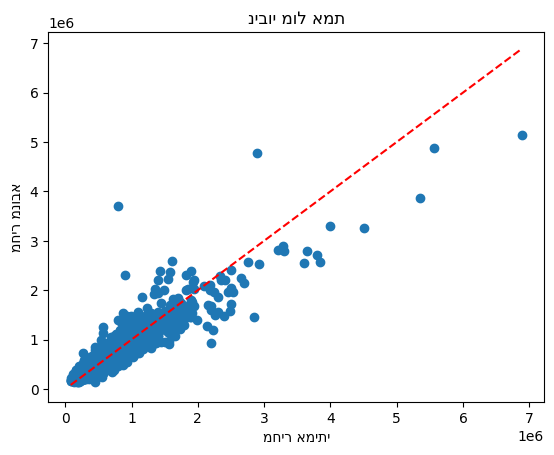

In [52]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("מחיר אמיתי")
plt.ylabel("מחיר מנובא")
plt.title("ניבוי מול אמת")
plt.show()


In [48]:
print(f"\n📊 תוצאות המודל:")
print(f"RMSE (סטיית טעות ממוצעת): {rmse:,.2f}")
print(f"R² (מקדם הסבר): {r2:.4f}")



📊 תוצאות המודל:
RMSE (סטיית טעות ממוצעת): 215,961.21
R² (מקדם הסבר): 0.6843


In [53]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n🌲 תוצאות מודל Random Forest:")
print(f"RMSE: {rmse:,.2f}")
print(f"R²: {r2:.4f}  → כלומר, המודל מסביר כ-{r2*100:.1f}% מהשונות במחירי הבתים.")




🌲 תוצאות מודל Random Forest:
RMSE: 142,087.27
R²: 0.8633  → כלומר, המודל מסביר כ-86.3% מהשונות במחירי הבתים.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


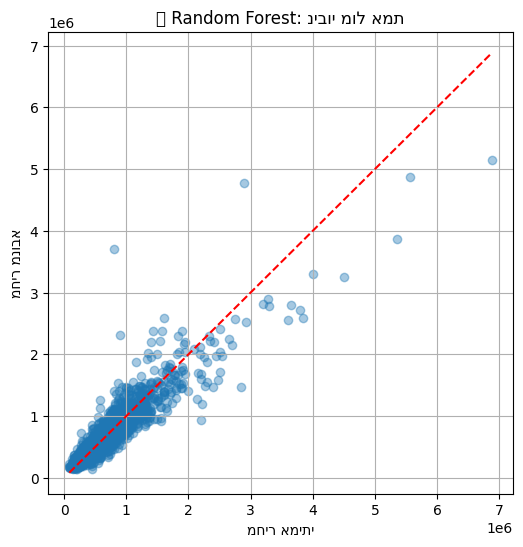

In [54]:

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("מחיר אמיתי")
plt.ylabel("מחיר מנובא")
plt.title("📈 Random Forest: ניבוי מול אמת")
plt.grid(True)
plt.show()